https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Expectation-Maximization

In [1]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html
# Compute minimum distances between one point and a set of points.
from sklearn.metrics import pairwise_distances_argmin

In [2]:
def draw_points(X,ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(number_of_clusters,ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(number_of_clusters), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax


In [3]:
def kmeans(number_of_clusters,num_iterations,plot_figs):
    # generate blobs of data points
    X, y_true = make_blobs(n_samples=300, centers=4,
                           cluster_std=0.60, random_state=0)

    # initialize random centroid locations
    rng = np.random.RandomState(42)
    centers = [0, number_of_clusters] + rng.randn(number_of_clusters, 2)

    if plot_figs:
        fig = plt.figure()
        ax = plt.gca()
        draw_points(X,ax, 'gray', factor=1)
        draw_centers(number_of_clusters,ax, centers, factor=1)
        print("initial centers")
        print(centers)
        plt.title('Random Initialization')

    for indx in range(num_iterations):    
        # E-step
        y_pred = pairwise_distances_argmin(X, centers) # given a set of point and a set of centroids, determine which group each point is most likely in
        if plot_figs:
            fig = plt.figure()
            ax = plt.gca()
            draw_points(X,ax, y_pred)
            draw_centers(number_of_clusters,ax, centers)
            plt.title('Expectation step '+str(indx))
    
        # M-step
        new_centers = np.array([X[y_pred == i].mean(0) for i in range(number_of_clusters)])
        if plot_figs:
            fig = plt.figure()
            ax = plt.gca()
            # where the centers are:
            print("centers "+str(indx))
            print(new_centers)
            draw_points(X,ax, y_pred)
            draw_centers(number_of_clusters,ax, centers, alpha=0.3)
            draw_centers(number_of_clusters,ax, new_centers)
            for loop_index in range(number_of_clusters):
                ax.annotate('', new_centers[loop_index], centers[loop_index],
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plt.title('Maximization step '+str(indx))
    
        # Finish iteration
        centers = new_centers

    # Final E-step    
    y_pred = pairwise_distances_argmin(X, centers)
    if plot_figs:
        fig = plt.figure()
        ax = plt.gca()
        draw_points(X, ax, y_pred, factor=1)
        draw_centers(number_of_clusters,ax, centers, factor=1)
        _=plt.title("Final Clustering")
    return X,y_pred,centers

within cluster sum of square 

In [4]:
X,y_pred,centers = kmeans(number_of_clusters=3,num_iterations=4,plot_figs=False)

In [16]:
list_of_sumofsq=[]
num_clstr_range=range(1,7)
for number_of_clusters in num_clstr_range:
    X,y_pred,centers = kmeans(number_of_clusters,num_iterations=4,plot_figs=False)
    sumofsq=0
    centroid_indx=-1
    for this_centroid_coords in centers:
        centroid_indx+=1
        for this_dot in X[y_pred==centroid_indx]:
            # https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
            sumofsq+=np.linalg.norm(this_dot - this_centroid_coords)**2
    list_of_sumofsq.append(sumofsq)
    print(number_of_clusters,sumofsq)

1 2812.1375953032334
2 1340.3267091030493
3 682.1431089738466
4 212.0059962108348
5 188.77323556773695
6 170.14349063243066


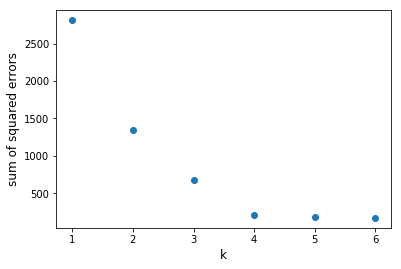

In [18]:
_=plt.scatter(num_clstr_range,y=list_of_sumofsq)
_=plt.xlabel('k',fontsize=12)
_=plt.ylabel('sum of squared errors',fontsize=12)

<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>

For an sklearn-based example, see

https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion